In [7]:

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
img=cv2.imread('/content/drive/MyDrive/emostion_recg_project/x_train (1)/contempt_face/2Q__ (1).jpg')

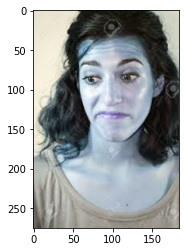

In [9]:
plt.imshow(img)

In [10]:
clr_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


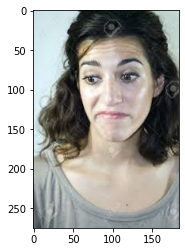

In [11]:
plt.imshow(clr_img)

In [28]:
face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/emostion_recg_project/haarcascade_frontalface_default.xml')

In [30]:
face=face_cascade.detectMultiScale(clr_img,1.3,5)
face


array([[ 35,  34, 128, 128]], dtype=int32)

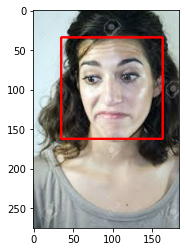

In [32]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(clr_img,(x,y),(x+w,y+h),(255,0,0),2)
  
    roi_color = face_img[y:y+h, x:x+w]
   
   
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

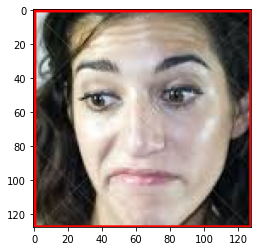

In [33]:
plt.imshow(roi_color)

In [34]:
def get_cropped_image(image_path):
  
   img = cv2.imread(image_path)
   clr_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
   face=face_cascade.detectMultiScale(clr_img,1.3,5)
   for (x,y,w,h) in face:
        roi_color = clr_img[y:y+h, x:x+w]
        return roi_color
         
        
            

In [35]:
croped_img=get_cropped_image('/content/drive/MyDrive/emostion_recg_project/x_test/anger_face/Z (1).jpg')

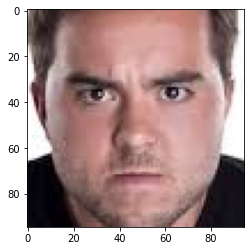

In [36]:
plt.imshow(croped_img)

In [37]:
path_to_data="/content/drive/MyDrive/emostion_recg_project/x_train (1)"
path_to_cr_data="/content/drive/MyDrive/emostion_recg_project/cropped"

In [38]:

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [39]:
img_dirs

['/content/drive/MyDrive/emostion_recg_project/x_train (1)/anger_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/contempt_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/disgust_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/fear_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/happy_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/sad_face',
 '/content/drive/MyDrive/emostion_recg_project/x_train (1)/surprised_face']

In [42]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [44]:

cropped_image_dirs = []
expression_names_dict = {}
for img_dir in img_dirs:
    count = 1
    expression_name = img_dir.split('/')[-1]
    expression_names_dict[expression_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + "/"+expression_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = expression_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_color)
            expression_names_dict[expression_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/anger_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/contempt_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/disgust_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/fear_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/happy_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/sad_face
Generating cropped images in folder:  /content/drive/MyDrive/emostion_recg_project/cropped/surprised_face


In [231]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [232]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(64,64,3),activation='relu'))

In [233]:
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

In [234]:
model.add(Flatten())

In [235]:
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=250))

In [237]:
model.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=7))

In [239]:
model.compile(loss="CategoricalCrossentropy",optimizer="adam",metrics="accuracy")

In [240]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=2.0,horizontal_flip=True)

In [241]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [242]:
from keras.preprocessing import image_dataset_from_directory

In [243]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/emostion_recg_project/x_train",target_size=(64,64),color_mode="rgb",batch_size=20)

Found 699 images belonging to 7 classes.


In [244]:
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/emostion_recg_project/x_test",target_size=(64,64),color_mode="rgb",batch_size=20)

Found 208 images belonging to 7 classes.


In [245]:
x_test.class_indices

{'anger_face': 0,
 'contempt_face': 1,
 'disgust_face': 2,
 'fear_face': 3,
 'happy_face': 4,
 'sad_face': 5,
 'surprised_face': 6}

In [322]:
model.fit_generator(x_train,epochs=200,validation_data=x_test)

Epoch 1/200
35/35 [==============================] - 2s 67ms/step - loss: 1.9086 - accuracy: 0.1888 - val_loss: 1.9593 - val_accuracy: 0.1250
Epoch 2/200
35/35 [==============================] - 2s 63ms/step - loss: 1.9080 - accuracy: 0.1888 - val_loss: 1.9610 - val_accuracy: 0.1250
Epoch 3/200
35/35 [==============================] - 2s 63ms/step - loss: 1.9072 - accuracy: 0.1888 - val_loss: 1.9618 - val_accuracy: 0.1250
Epoch 4/200
35/35 [==============================] - 2s 63ms/step - loss: 1.9068 - accuracy: 0.1888 - val_loss: 1.9639 - val_accuracy: 0.1250
Epoch 5/200
35/35 [==============================] - 2s 63ms/step - loss: 1.9063 - accuracy: 0.1888 - val_loss: 1.9647 - val_accuracy: 0.1250
Epoch 6/200
35/35 [==============================] - 2s 63ms/step - loss: 1.9062 - accuracy: 0.1888 - val_loss: 1.9655 - val_accuracy: 0.1250
Epoch 7/200
35/35 [==============================] - 2s 64ms/step - loss: 1.9058 - accuracy: 0.1888 - val_loss: 1.9666 - val_accuracy: 0.1250
Epoch 

In [324]:
model.save("model_final.h5")

In [325]:
from keras.models import load_model

In [326]:
model=load_model("model_final.h5")

In [332]:
image=cv2.imread("/content/drive/MyDrive/emostion_recg_project/train/fear_face/9k_ (2).jpg")

In [333]:
image.shape

(203, 248, 3)

In [363]:
def detect(image):
  image=cv2.resize(image,(64,64))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  prediction=model.predict_classes(image)
  data=["Anger","Contempt","Disgust","Fear","Happy","Sad","Surprised"]
  output=data[prediction[0]]
  return output

In [364]:
detect(image)

'Happy'

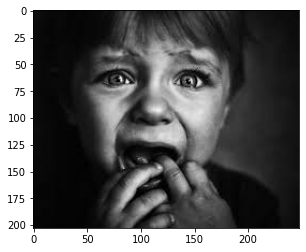

In [337]:
plt.imshow(image)